In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
stock = yf.Ticker("BRITANNIA.NS")

In [ ]:
data = yf.download('BRITANNIA.NS', start='1996-01-01', end='2024-08-13',interval='1d',actions=False)


[*********************100%***********************]  1 of 1 completed


In [ ]:
data.count()

,0
Open,7187
High,7187
Low,7187
Close,7187
Adj Close,7187
Volume,7187


In [ ]:
df = data['Close']

In [ ]:
df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
df.drop(['Date'],axis=1,inplace=True)

In [ ]:
df = df.reset_index()

In [ ]:
mm = MinMaxScaler(feature_range=(0, 1))
df = mm.fit_transform(df)

In [ ]:
type(df)

numpy.ndarray

In [ ]:
 #Here we are finding length of training dataset and testing dataset

 len_train = int(len(df)*0.8)
 len_test = len(df) - len_train

In [ ]:
x_train = df[:len_train]
x_test = df[len_train:]

In [ ]:
xnew_train =[]
ynew_train=[]

for i in range(60,len(x_train)):
    z=[]
    for j in range(i-60,i):
        z.append(x_train[j])
    xnew_train.append(z)
    ynew_train.append(x_train[i])

In [ ]:
xnew_test =[]
ynew_test=[]
for i in range(60,len(x_test)):
    z=[]
    for j in range(i-60,i):
        z.append(x_test[j])
    xnew_test.append(z)
    ynew_test.append(x_test[i])

In [ ]:
xnew_test[0]

array([[0.4834282 ],
       [0.47619182],
       [0.47862641],
       [0.46519401],
       [0.46708526],
       [0.46848788],
       [0.46043434],
       [0.44995464],
       [0.44567093],
       [0.44661446],
       [0.45316427],
       [0.45734688],
       [0.47387517],
       [0.46873217],
       [0.47024433],
       [0.47980579],
       [0.48037443],
       [0.48037443],
       [0.48249734],
       [0.48343239],
       [0.4880657 ],
       [0.48454441],
       [0.48853747],
       [0.4994468 ],
       [0.50297653],
       [0.49448076],
       [0.5042486 ],
       [0.5045898 ],
       [0.50453501],
       [0.50680954],
       [0.50063462],
       [0.50930735],
       [0.53245703],
       [0.51977861],
       [0.51954275],
       [0.51952589],
       [0.50155709],
       [0.50475828],
       [0.5005967 ],
       [0.50338512],
       [0.51337622],
       [0.52798377],
       [0.52672858],
       [0.53135345],
       [0.53228011],
       [0.54241445],
       [0.53264238],
       [0.524

In [ ]:
xnew_train = np.array(xnew_train)
ynew_train = np.array(ynew_train)
xnew_test = np.array(xnew_test)

In [ ]:
xnew_train[0]

array([[1.90948620e-04],
       [1.68483953e-04],
       [1.68483953e-04],
       [1.69607259e-04],
       [1.79716206e-04],
       [1.79716206e-04],
       [1.01090276e-04],
       [1.01090276e-04],
       [1.01090276e-04],
       [1.01090276e-04],
       [3.36967585e-05],
       [3.36967585e-05],
       [0.00000000e+00],
       [6.73935170e-05],
       [6.73935170e-05],
       [6.73935170e-05],
       [6.73935170e-05],
       [8.98581834e-05],
       [8.98581834e-05],
       [3.36967585e-05],
       [3.36967585e-05],
       [6.17774710e-05],
       [1.68483953e-04],
       [3.36967907e-04],
       [3.79088895e-04],
       [3.93129331e-04],
       [3.48200159e-04],
       [3.58309267e-04],
       [5.39148618e-04],
       [5.95310043e-04],
       [5.39148618e-04],
       [6.12158503e-04],
       [6.06542135e-04],
       [5.44764825e-04],
       [5.39148618e-04],
       [5.61613285e-04],
       [5.61613285e-04],
       [5.72845377e-04],
       [5.82954485e-04],
       [5.79023156e-04],


In [ ]:
xnew_train[0].shape

(60, 1)

In [ ]:
xnew_train.shape

(5689, 60, 1)

In [ ]:
ynew_train.shape

(5689, 1)

In [ ]:
xnew_test.shape

(1378, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(60, return_sequences =True, input_shape=(xnew_train.shape[1],1)))
# model.add(Dropout(0.2))
model.add(LSTM(120, return_sequences =True))
# model.add(Dropout(0.2))
model.add(SimpleRNN(80))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(xnew_train,ynew_train,epochs=5)

Epoch 1/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - loss: 2.3385e-05
Epoch 2/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 27s 153ms/step - loss: 2.5616e-05
Epoch 3/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 36s 128ms/step - loss: 2.4132e-05
Epoch 4/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - loss: 2.5448e-05
Epoch 5/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 42s 126ms/step - loss: 2.8672e-05


In [ ]:
xnew_test = xnew_test.reshape((xnew_test.shape[0], xnew_test.shape[1], 1))

In [ ]:
xnew_test.shape[0]

1378

In [ ]:
xnew_test.shape[1]

60

In [ ]:
xnew_test.shape

(1378, 60, 1)

In [ ]:
len(xnew_test[0])
print(xnew_test[0].shape)

(60, 1)


In [ ]:
pred = model.predict([xnew_test])

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


In [ ]:
xnew_test.shape

(1378, 60, 1)

In [ ]:
x_test.shape

(1438, 1)

In [ ]:
for i in range(len(pred)):
    print(pred[i])

[0.52140546]
[0.5214703]
[0.52137244]
[0.52080405]
[0.52053523]
[0.5215363]
[0.52385646]
[0.52679]
[0.529002]
[0.52990055]
[0.530901]
[0.5324402]
[0.5335429]
[0.5348233]
[0.5354977]
[0.5360472]
[0.5361819]
[0.535987]
[0.5366545]
[0.5375123]
[0.5374337]
[0.5367991]
[0.53430045]
[0.5299884]
[0.5244246]
[0.5170676]
[0.50694364]
[0.49733576]
[0.48973897]
[0.48454627]
[0.48393232]
[0.4870998]
[0.4924921]
[0.4997699]
[0.5054452]
[0.50912994]
[0.5112718]
[0.5123852]
[0.51286155]
[0.5128158]
[0.5122267]
[0.5125348]
[0.5135632]
[0.51493347]
[0.51771724]
[0.5198777]
[0.5213066]
[0.5221897]
[0.52156603]
[0.52030456]
[0.51979864]
[0.51934355]
[0.5183423]
[0.51704925]
[0.51479447]
[0.5112171]
[0.5075914]
[0.505165]
[0.5040277]
[0.502877]
[0.50159365]
[0.4996556]
[0.49729854]
[0.49540082]
[0.49568498]
[0.49731544]
[0.49899828]
[0.5003167]
[0.5004985]
[0.49986348]
[0.49948362]
[0.49865174]
[0.49640945]
[0.4913467]
[0.48263744]
[0.47206628]
[0.4613752]
[0.45230743]
[0.44655678]
[0.44395444]
[0.4436314

In [ ]:
print(len(pred),len(ynew_test))

1378 1378


In [ ]:
pred = np.array(pred)
ynew_test = np.array(ynew_test)

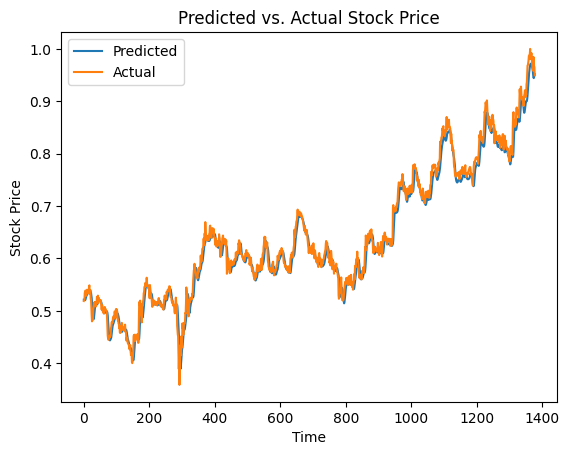

In [ ]:
import matplotlib.pyplot as plt

plt.plot(pred.flatten(), label='Predicted')  # Plot pred as a line
plt.plot(ynew_test.flatten(), label='Actual') # Plot ynew_test as a line

plt.xlabel('Time')  # Assuming your x-axis represents time
plt.ylabel('Stock Price') # Assuming your data is about stock prices
plt.title('Predicted vs. Actual Stock Price')
plt.legend()  # Show the legend
plt.show()

In [ ]:
m = mm.inverse_transform(pred)
n = mm.inverse_transform(ynew_test)

In [ ]:
print(m)
print(n)

[[3104.1558]
 [3104.5405]
 [3103.9597]
 ...
 [5630.1826]
 [5648.764 ]
 [5658.5625]]
[[3088.94995117]
 [3096.85009766]
 [3113.64990234]
 ...
 [5744.64990234]
 [5740.29980469]
 [5645.75      ]]


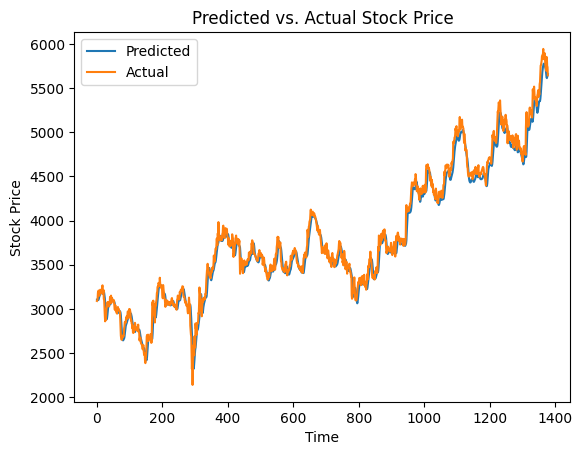

In [ ]:
plt.plot(m.flatten(), label='Predicted')  # Plot pred as a line
plt.plot(n.flatten(), label='Actual') # Plot ynew_test as a line

plt.xlabel('Time')  # Assuming your x-axis represents time
plt.ylabel('Stock Price') # Assuming your data is about stock prices
plt.title('Predicted vs. Actual Stock Price')
plt.legend()  # Show the legend
plt.show()